In [1]:
from traffic.data import airac as sectors
from traffic.data.so6 import SO6

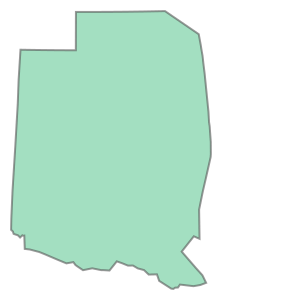

In [2]:
sectors['LFBB']

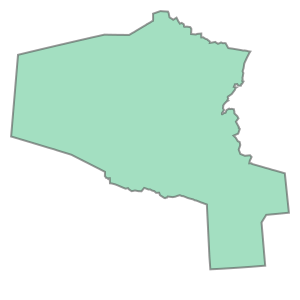

In [3]:
# if ambiguous, give type
sectors['LFFF/UIR']

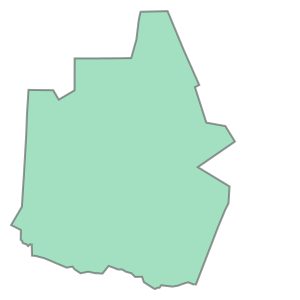

In [4]:
# accessors
sectors['LFBBBDX']

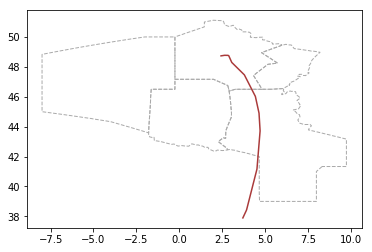

In [5]:
# Basic plotting

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for name in ("LFBB", 'LFEE', 'LFRR', 'LFMM', 'LFFF/FIR'):
    sectors[name].plot(ax, edgecolor="#aaaaaa", lw=1, linestyle='--')
    
so6 = SO6.from_file('../data/20180101_20180101_0000_2359_____m3.pkl')
so6['DAH1008'].plot(ax, color='#aa3a3a')

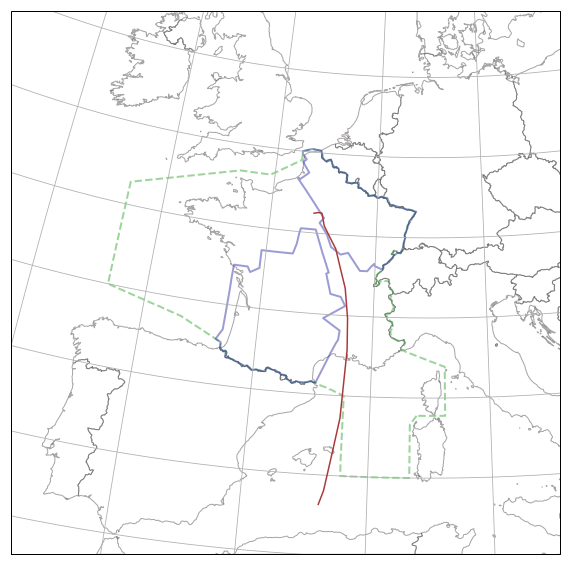

In [6]:
from traffic.drawing import EuroPP, countries

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=EuroPP())

ax.add_feature(countries())
ax.gridlines()
ax.set_extent((-10, 15, 35, 55))

sectors['LFFF/UIR'].plot(ax, edgecolor="#3aaa3a", lw=2, alpha=.5, linestyle='dashed')

sectors['LFBBBDX'].plot(ax, edgecolor="#3a3aaa", lw=2, alpha=.5)
sectors['LFEERMS'].plot(ax, edgecolor="#3a3aaa", lw=2, alpha=.5)

so6['DAH1008'].plot(ax, color='#aa3a3a')

In [7]:
bdx = sectors['LFBBBDX']
# callsigns at noon inside LFBBBDX
bdx_noon = so6.at("2018-01-01 12:00").inside_bbox(bdx).intersects(bdx)
# full so6 limited to flights hereabove
so6_bdx_noon = so6.select(bdx_noon)

A Jupyter Widget

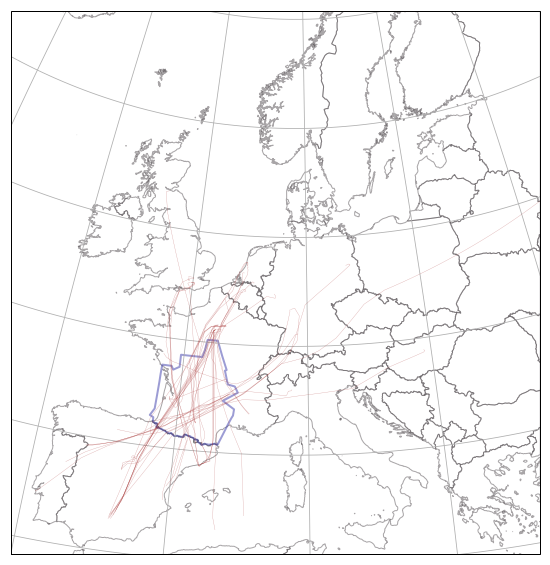

In [9]:
# Plot: les vols qui passent par un secteur à midi

from tqdm import tqdm_notebook

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=EuroPP())

ax.add_feature(countries())
ax.gridlines()
ax.set_extent((-10, 30, 35, 65))

bdx.plot(ax, edgecolor="#3a3aaa", lw=2, alpha=.5)

for _, flight in tqdm_notebook(so6_bdx_noon, total=len(so6_bdx_noon)):
    flight.plot(ax, color='#aa3a3a', lw=.3, alpha=.5)